In [1]:
# HIDDEN
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
import math
from scipy import stats
from scipy import misc

### Occupation Times Within a Block ###
Suppose the chain starts at $i$. Then it is intuitively plausible that once it returns to $i$, it "starts all over again" as though it were starting at $i$ at time 0. This hand-wavy statement can be turned into mathematics, but in this course we'll just accept it without doing the math. 

Start the chain at $i$, that is, with the initial distribution $P(X_0 = i) = 1$. Define an *$i$-block* to be the chain till the step before it returns to $i$:

- Under the initial condition that $X_0 = i$, an $i$-block is $X_0, X_1, X_2, \ldots, X_{W_i - 1}$.

Here $W_i$ is the hitting time of $i$ as defined in the previous section:

$$
W_i = \inf \{n \ge 1: X_n = i \}
$$

Notice that in an $i$-block, the chain is only at $i$ once, at time 0.

Notice also that the length of the $i$-block is $W_i$. You can see this by counting indices in the definition of the $i$-block. But the $i$-block doesn't end at time $W_i$; it ends one step earlier. Its length is $W_i$ because it includes time 0, whereas $W_i$ starts counting time at 1. Informally, the $i$-block includes the $i$ at the start of the block but not the $i$ directly following the block, whereas $W_i$ doesn't include time 0 but does include the moment when $i$ appears at the end of the block.

This will become clear when you look at the graph below, in which $i = 3$. The blue dots are the $i$-block. There are 8 dots in it, corresponding to times 0 through 7. The red dot immediately after the $i$-block shows the return to $i$. It's at time 8.

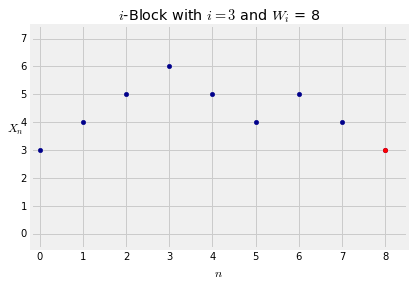

In [20]:
# HIDDEN
tosses = make_array(1, 1, 1, -1, -1, 1, -1, -1)
fortune = np.cumsum(np.append(3, tosses))
plt.scatter(np.arange(9), fortune, color='darkblue')
plt.scatter(8, 3, color='r')
plt.ylim(-0.5, 7.5)
plt.xlim(-0.2, 8.5)
plt.xlabel('$n$')
plt.ylabel('$X_n$', rotation=0)
plt.xticks(np.arange(0, 9, 1))
plt.yticks(np.arange(0, 8, 1))
plt.title('$i$-Block with $i=3$ and $W_i$ = 8');

We have been careful not to include $X_{W_i}$ in the $i$-block. At time $W_i$ the chain returns to $i$, and we will think of that as the start of the next $i$-block. Because the chain "starts over" at $i$, we can imagine the entire chain as identically distributed $i$-blocks strung together one after another. Therefore there are close relations between long run properties of the chain and short run properties on an $i$-block. Let's look at one of these relations.

Let $X_0 = i$ and let $N(j)$ be the number of times the chain is at $j$ in the $i$-block. We will call $N(j)$ the *number of visits to $j$ in an $i$-block*.

As we have already observed, $N(i) = 1$ with probability 1. By partitioning the $i$-block according to visits to the different states, the length of the $i$-block can be written as a sum:

$$
\text{length of } i\text{-block} = W_i = 1 + \sum_{j \ne i} N(j)
$$

You can check this in the graph above where $i=3$. The graph shows a path for which $N(3) = 1$, $N(4) = 3 = N(5)$, $N(6) = 1$, and $N(j) = 0$ for all other states $j$. The sum of all these occupation times is 8, which is also the value of $W_i$.

So
$$
\frac{1}{\pi(i)} = E(W_i \mid X_0 = i) = 1 + \sum_{j \ne i} E(N(j) \mid X_0 = i)
$$

### Expected Occupation Times in an $i$-Block ###
Fix a state $j$. The expected number of visits to $j$ in an $i$-block is

$$
E(N(j) \mid X_0 = i) = \frac{\pi(j)}{\pi(i)}
$$

A formal proof requires a little care; we won't go through it. Rather, we will show why the formula is consistent with our previous calculations and with intuition.

- The formula is correct for $j = i$, because $N(i) = 1$ with probability 1.
- The terms add up to $\frac{1}{\pi(i)}$ as we have shown they must.

$$
1 + \sum_{j \ne i} \frac{\pi(j)}{\pi(i)} 
~ = ~ \frac{\pi(i)}{\pi(i)} + \sum_{j \ne i} \frac{\pi(j)}{\pi(i)} 
~ = ~ \frac{1}{\pi(i)} \big{(} \sum_{\text{all }j} \pi(j) \big{)} 
~ = ~ \frac{1}{\pi(i)}
$$

because $\pi$ is a probability distribution and hence sums to 1.

- Think of the chain as a string of $i$-blocks. You know that overall, the expected proportion of times that the chain spends at $j$ is $\pi(j)$. Since the $i$-blocks are identically distributed copies of each other, it makes sense that the chain is expected to spend the same proportion $\pi(j)$ of time in $j$ in each $i$-block. Since the length of an $i$-block is expected to be $1/\pi(i)$, the expected number of times the chain is at $j$ in an $i$-block is $\pi(j)/\pi(i)$.

### Example: Ehrenfest Model ####
In the example of the Ehrenfest model we worked with in the previous section, the stationary distribution is binomial $(N, 1/2)$. Suppose the chain starts at $X_n = 0$, that is, with Container 1 empty. Then for every $k$, the expected number of times Container 1 has $k$ particles before it is once again empty is

$$
\frac{\binom{N}{k}(1/2)^N}{\binom{N}{0}(1/2)^N} = \binom{N}{k}
$$

### Example: Uniform Stationary Distribution ###
Consider any chain that has a stationary distribution that is uniform. You have seen in exercises that chains with doubly stochastic transition matrices fall into this category. Suppose such a chain starts at state $i$. Then for any other state $j$, the expected number of times the chain visits $j$ before returning to $i$ is 1.